  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
        

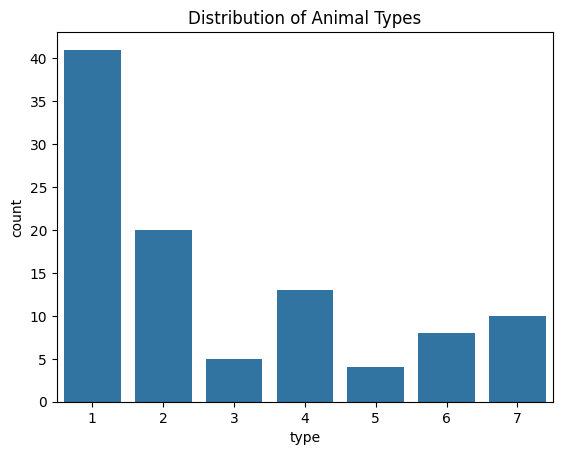

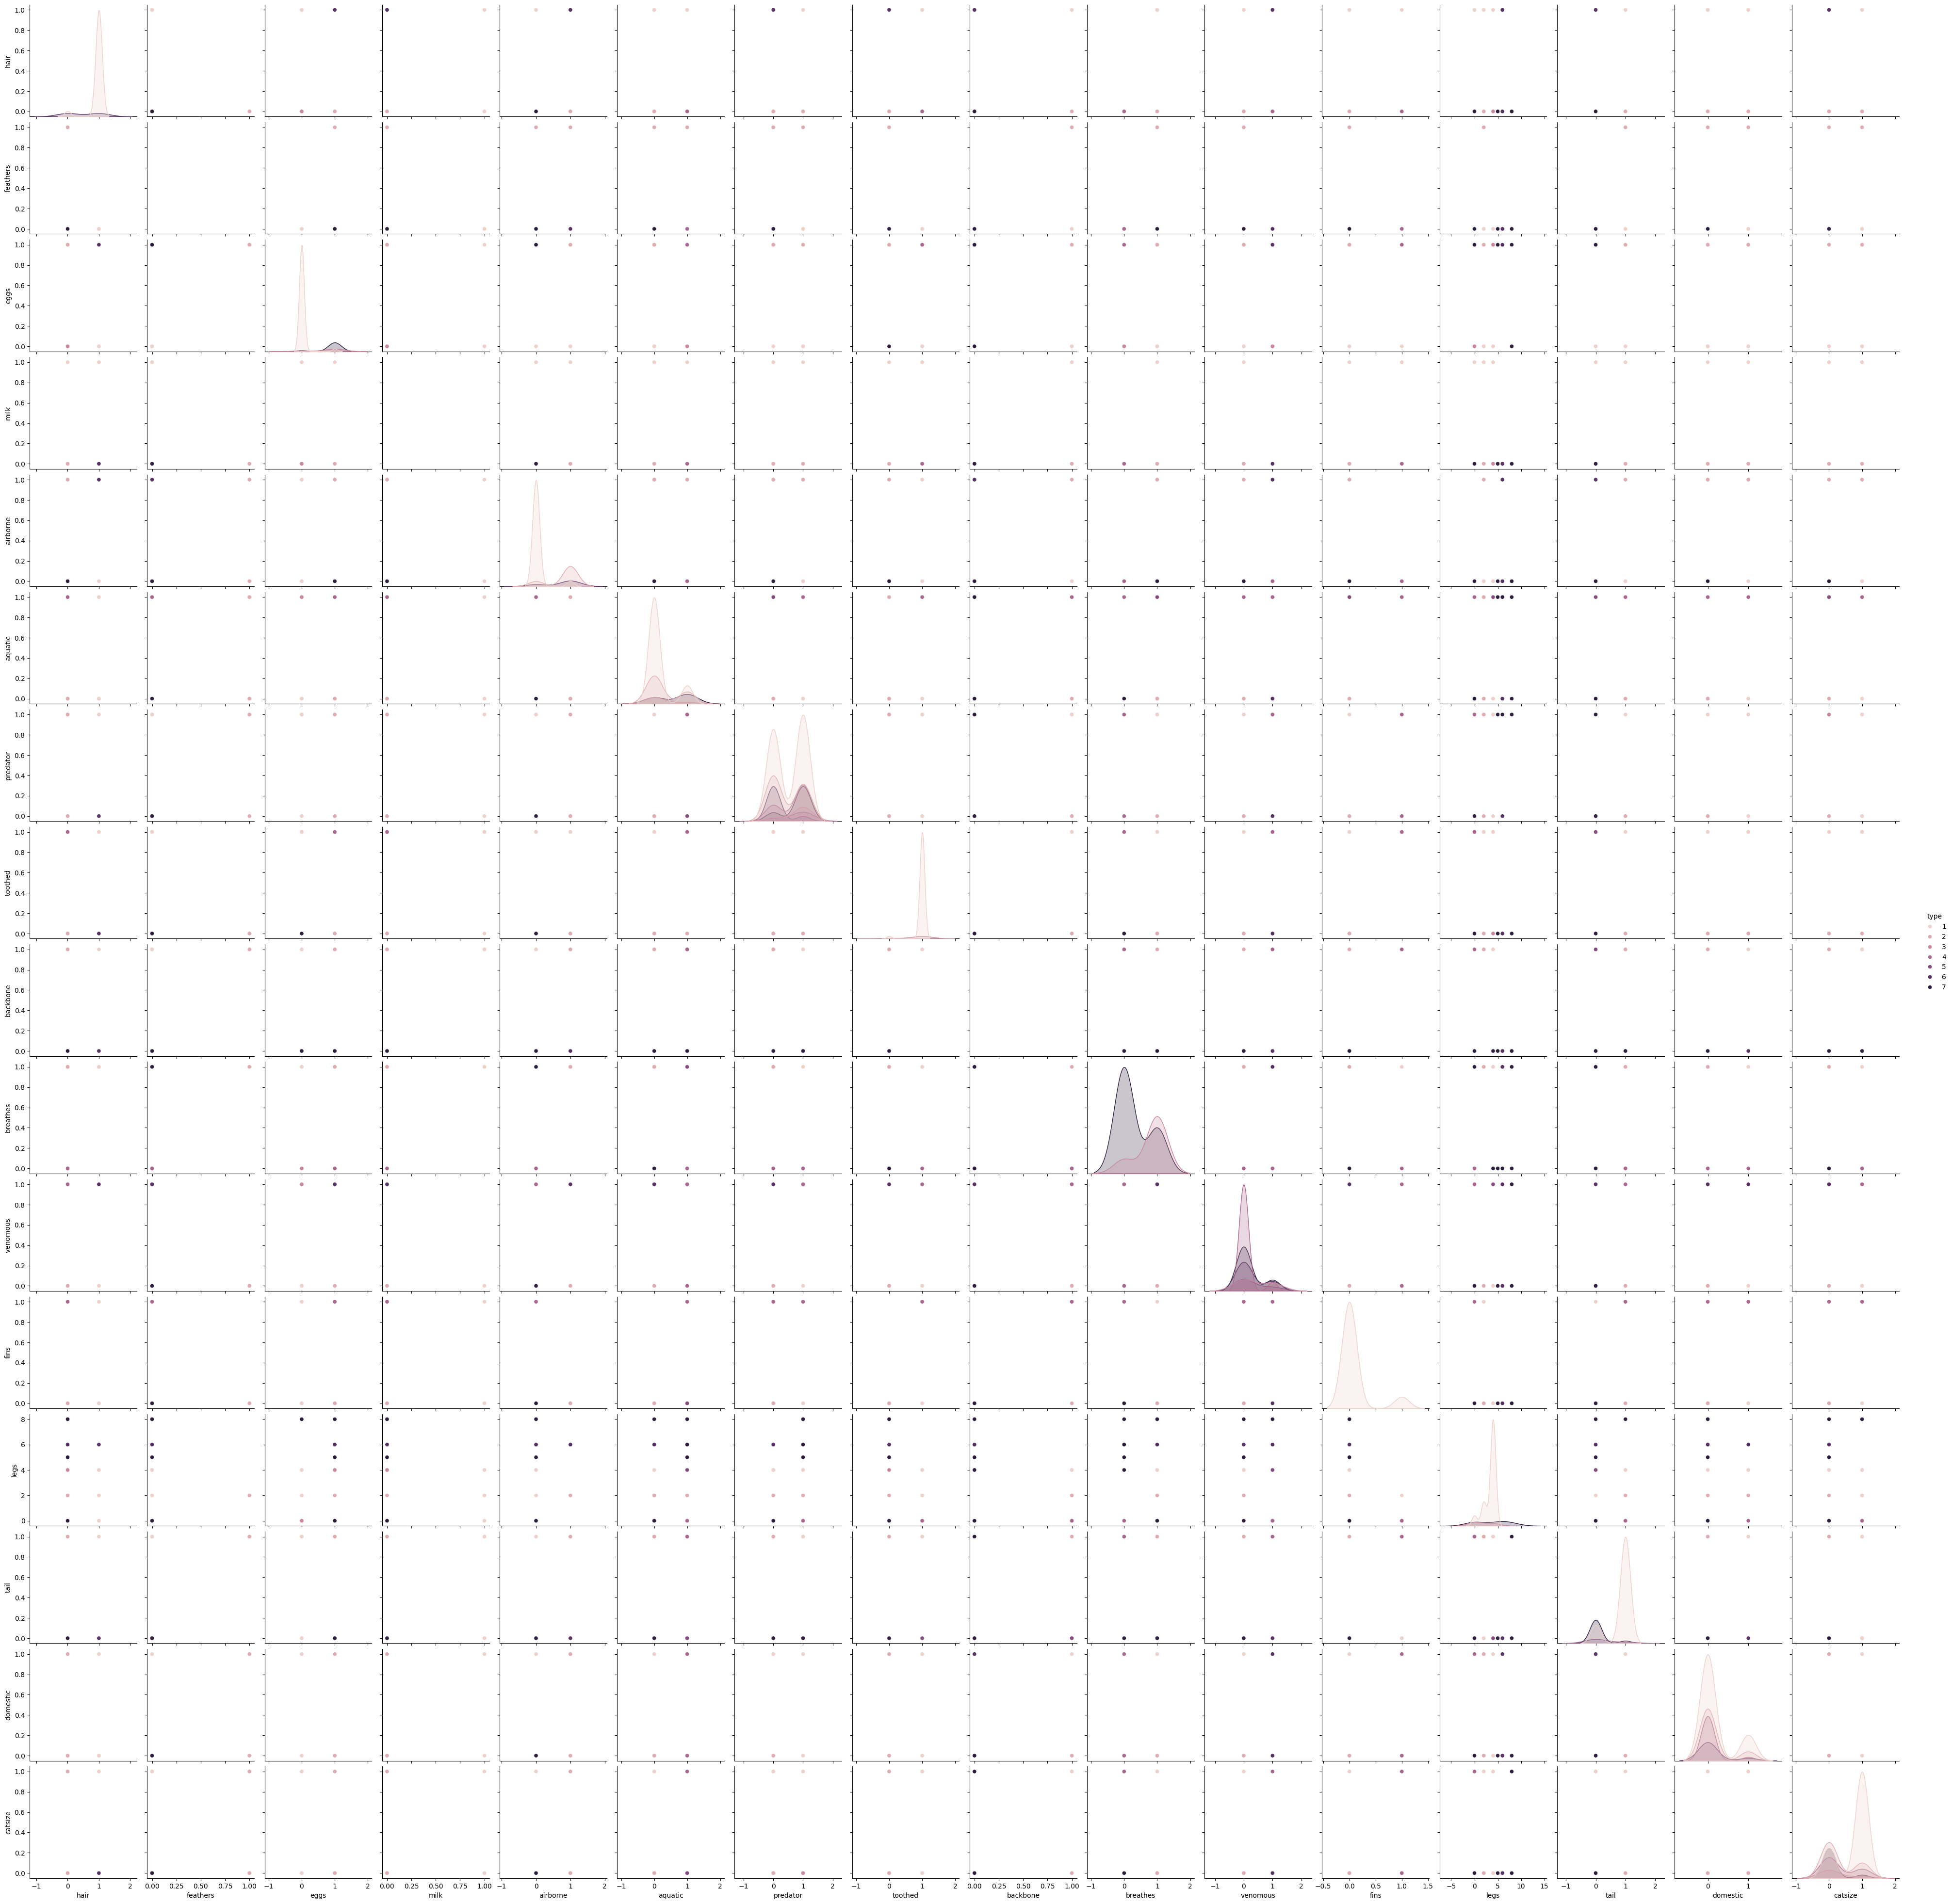

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#load the data set
zoo_df = pd.read_csv('Zoo.csv')

print(zoo_df.head())

#summary statistics
print(zoo_df.describe())

#check for missing values
print(zoo_df.isnull().sum())

sns.countplot(x='type', data=zoo_df)
plt.title('Distribution of Animal Types')
plt.show()

sns.pairplot(zoo_df, hue='type')
plt.show()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


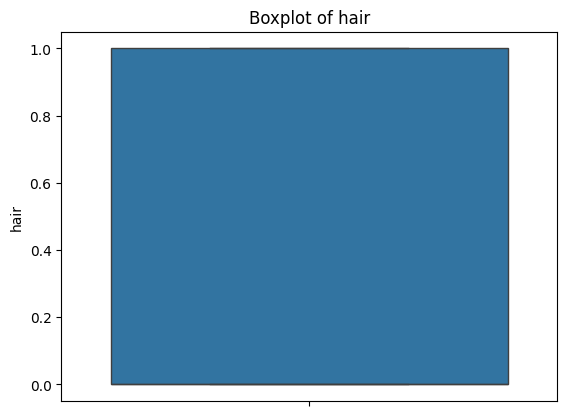

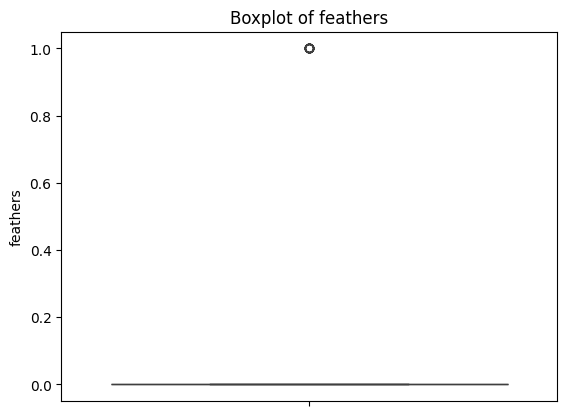

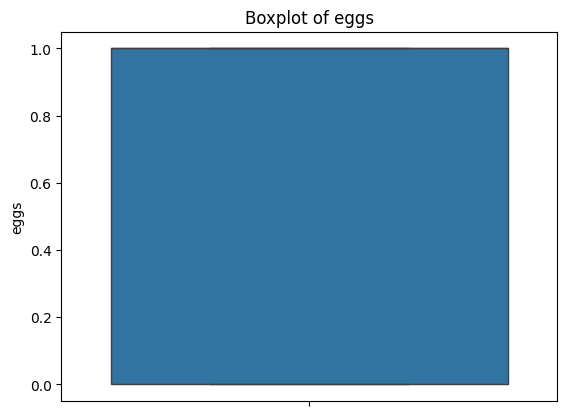

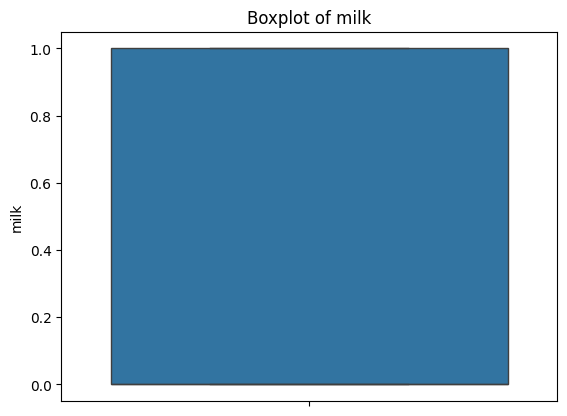

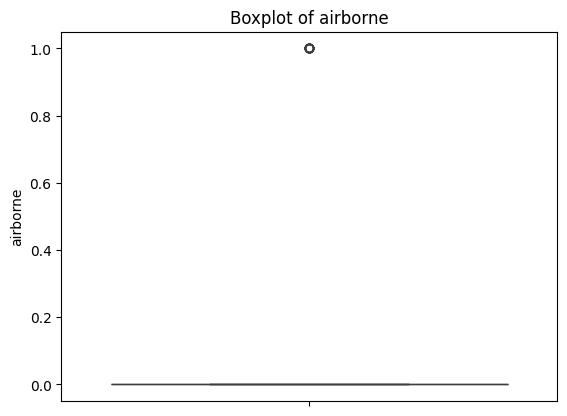

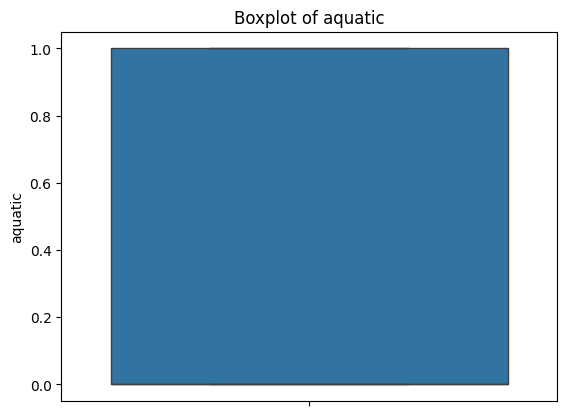

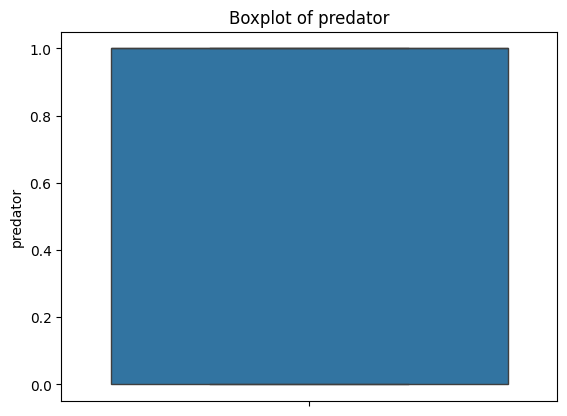

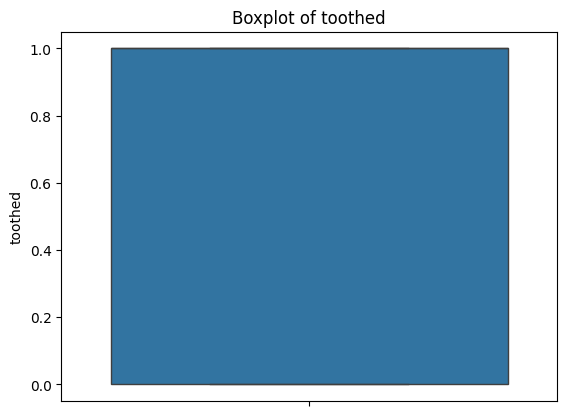

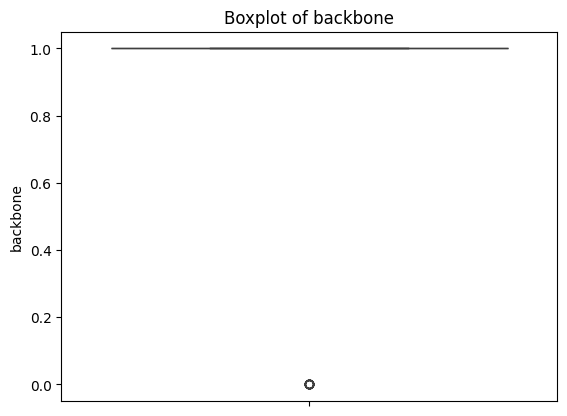

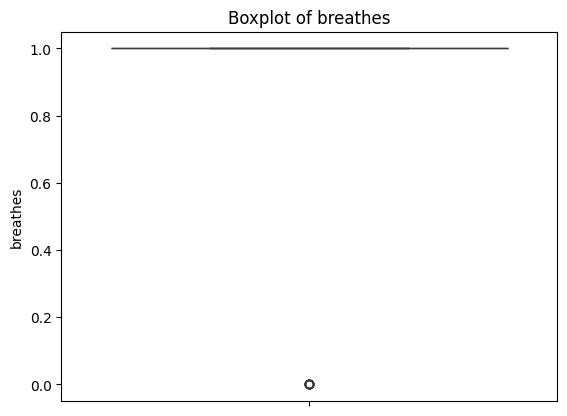

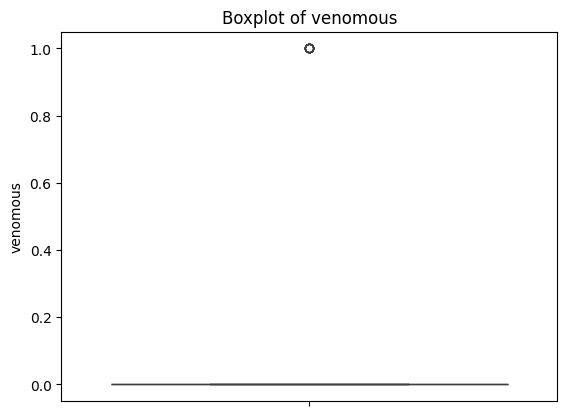

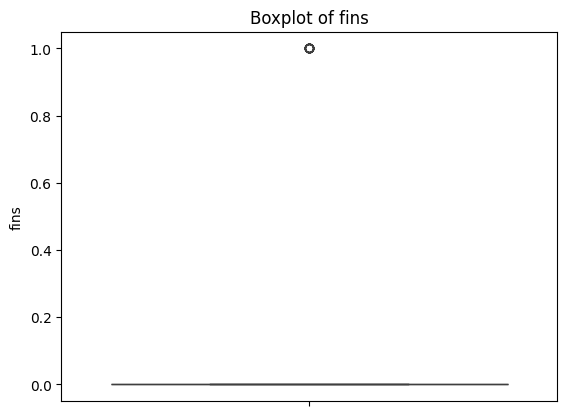

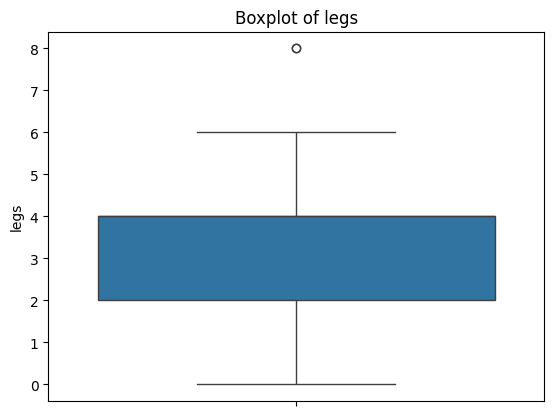

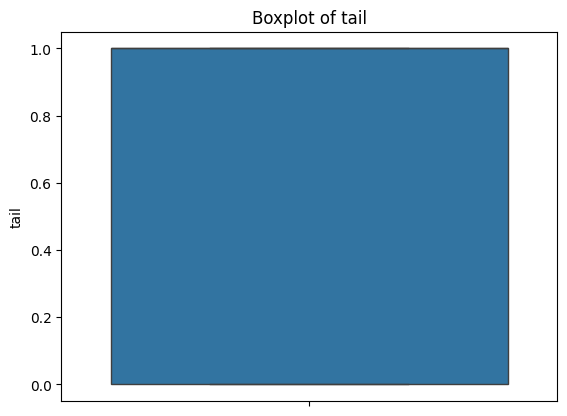

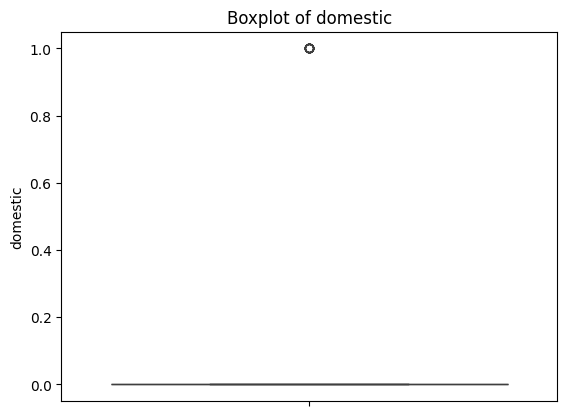

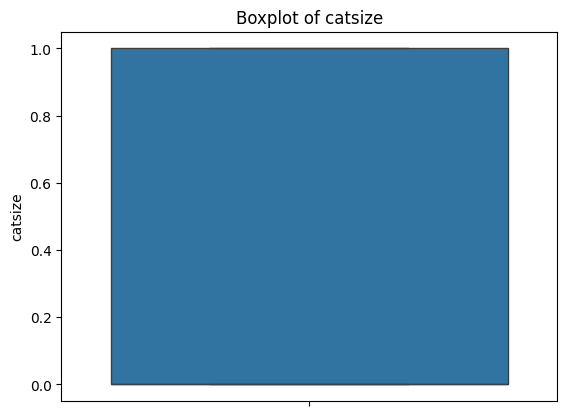

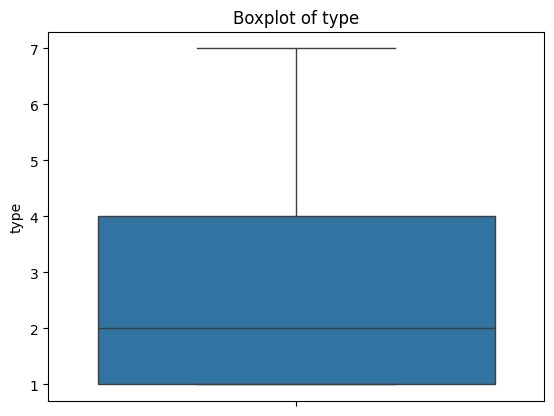

In [13]:
#check the missing values
print(zoo_df.isnull().sum())

numeric_features = zoo_df.select_dtypes(include=['int64', 'float64']).columns

for features in numeric_features:
  sns.boxplot(y=zoo_df[features])
  plt.title(f'Boxplot of {features}')
  plt.show()


In [14]:
#splitting the dataset
zoo_df.columns
col=['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone',
     'breathes', 'venomous', 'fins', 'legs', 'domestic', 'catsize']

In [15]:
from sklearn.model_selection import train_test_split

x = zoo_df.drop(columns=['animal name', 'type'], axis=1)
y = zoo_df['type']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 80
Testing set size: 21


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.8957902001380263


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'k={k}, Accuracy: {accuracy_score(y_test, y_pred)}')

k=1, Accuracy: 1.0
k=3, Accuracy: 0.9523809523809523
k=5, Accuracy: 0.9047619047619048
k=7, Accuracy: 0.8571428571428571
k=9, Accuracy: 0.8571428571428571


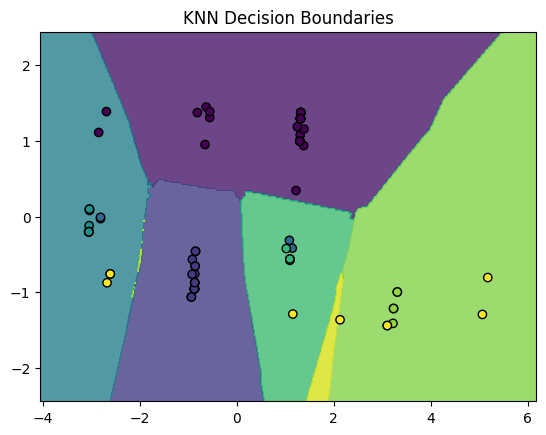

In [19]:
#visualizing decision boundary

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)

#visualize decision boundaries
import numpy as np

h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o')
plt.title('KNN Decision Boundaries')
plt.show()






In [ ]:
#interview question

In [20]:
'''
ey Hyperparameters in KNN: The key hyperparameters include the number of neighbors (k), the distance metric (e.g., Euclidean, Manhattan), and weights (uniform or distance-based).
Distance Metrics in KNN: Common distance metrics used in KNN are Euclidean distance, Manhattan distance, and Minkowski distance.
'''

'\ney Hyperparameters in KNN: The key hyperparameters include the number of neighbors (k), the distance metric (e.g., Euclidean, Manhattan), and weights (uniform or distance-based).\nDistance Metrics in KNN: Common distance metrics used in KNN are Euclidean distance, Manhattan distance, and Minkowski distance.\n'